In [27]:
import pandas as pd
from scipy import stats
import seaborn as sns
from scipy import stats
from scipy.stats import chi2_contingency
from scipy.stats import pearsonr

In [13]:
# chargement du fichier csv, dans un dataframe
data = pd.read_csv('main_dataset.csv')


Exploration des données et selection de la problématique de machine learning

In [14]:
data

,title,title_orig,price,retail_price,currency_buyer,units_sold,uses_ad_boosts,rating,rating_count,rating_five_count,...,merchant_rating_count,merchant_rating,merchant_id,merchant_has_profile_picture,merchant_profile_picture,product_url,product_picture,product_id,theme,crawl_month
0,2020 Summer Vintage Flamingo Print Pajamas Se...,2020 Summer Vintage Flamingo Print Pajamas Se...,16.00,14,EUR,100,0,3.76,54,26.0,...,568,4.128521,595097d6a26f6e070cb878d1,0,NaN,https://www.wish.com/c/5e9ae51d43d6a96e303acdb0,https://contestimg.wish.com/api/webimage/5e9ae...,5e9ae51d43d6a96e303acdb0,summer,2020-08
1,SSHOUSE Summer Casual Sleeveless Soirée Party ...,Women's Casual Summer Sleeveless Sexy Mini Dress,8.00,22,EUR,20000,1,3.45,6135,2269.0,...,17752,3.899673,56458aa03a698c35c9050988,0,NaN,https://www.wish.com/c/58940d436a0d3d5da4e95a38,https://contestimg.wish.com/api/webimage/58940...,58940d436a0d3d5da4e95a38,summer,2020-08
2,2020 Nouvelle Arrivée Femmes Printemps et Été ...,2020 New Arrival Women Spring and Summer Beach...,8.00,43,EUR,100,0,3.57,14,5.0,...,295,3.989831,5d464a1ffdf7bc44ee933c65,0,NaN,https://www.wish.com/c/5ea10e2c617580260d55310a,https://contestimg.wish.com/api/webimage/5ea10...,5ea10e2c617580260d55310a,summer,2020-08
3,Hot Summer Cool T-shirt pour les femmes Mode T...,Hot Summer Cool T Shirt for Women Fashion Tops...,8.00,8,EUR,5000,1,4.03,579,295.0,...,23832,4.020435,58cfdefdacb37b556efdff7c,0,NaN,https://www.wish.com/c/5cedf17ad1d44c52c59e4aca,https://contestimg.wish.com/api/webimage/5cedf...,5cedf17ad1d44c52c59e4aca,summer,2020-08
4,Femmes Shorts d'été à lacets taille élastique ...,Women Summer Shorts Lace Up Elastic Waistband ...,2.72,3,EUR,100,1,3.10,20,6.0,...,14482,4.001588,5ab3b592c3911a095ad5dadb,0,NaN,https://www.wish.com/c/5ebf5819ebac372b070b0e70,https://contestimg.wish.com/api/webimage/5ebf5...,5ebf5819ebac372b070b0e70,summer,2020-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1568,Nouvelle Mode Femmes Bohême Pissenlit Imprimer...,New Fashion Women Bohemia Dandelion Print Tee ...,6.00,9,EUR,10000,1,4.08,1367,722.0,...,5316,4.224605,5b507899ab577736508a0782,0,NaN,https://www.wish.com/c/5d5fadc99febd9356cbc52ee,https://contestimg.wish.com/api/webimage/5d5fa...,5d5fadc99febd9356cbc52ee,summer,2020-08
1569,10 couleurs femmes shorts d'été lacent ceintur...,10 Color Women Summer Shorts Lace Up Elastic W...,2.00,56,EUR,100,1,3.07,28,11.0,...,4435,3.696054,54d83b6b6b8a771e478558de,0,NaN,https://www.wish.com/c/5eccd22b4497b86fd48f16b4,https://contestimg.wish.com/api/webimage/5eccd...,5eccd22b4497b86fd48f16b4,summer,2020-08
1570,Nouveautés Hommes Siwmwear Beach-Shorts Hommes...,New Men Siwmwear Beach-Shorts Men Summer Quick...,5.00,19,EUR,100,0,3.71,59,24.0,...,210,3.961905,5b42da1bf64320209fc8da69,0,NaN,https://www.wish.com/c/5e74be96034d613d42b52dfe,https://contestimg.wish.com/api/webimage/5e74b...,5e74be96034d613d42b52dfe,summer,2020-08
1571,Mode femmes d'été sans manches robes col en V ...,Fashion Women Summer Sleeveless Dresses V Neck...,13.00,11,EUR,100,0,2.50,2,0.0,...,31,3.774194,5d56b32c40defd78043d5af9,0,NaN,https://www.wish.com/c/5eda07ab0e295c2097c36590,https://contestimg.wish.com/api/webimage/5eda0...,5eda07ab0e295c2097c36590,summer,2020-08


In [15]:
# détails des colonnes 
data.columns

Index(['title', 'title_orig', 'price', 'retail_price', 'currency_buyer',
       'units_sold', 'uses_ad_boosts', 'rating', 'rating_count',
       'rating_five_count', 'rating_four_count', 'rating_three_count',
       'rating_two_count', 'rating_one_count', 'badges_count',
       'badge_local_product', 'badge_product_quality', 'badge_fast_shipping',
       'tags', 'product_color', 'product_variation_size_id',
       'product_variation_inventory', 'shipping_option_name',
       'shipping_option_price', 'shipping_is_express', 'countries_shipped_to',
       'inventory_total', 'has_urgency_banner', 'urgency_text',
       'origin_country', 'merchant_title', 'merchant_name',
       'merchant_info_subtitle', 'merchant_rating_count', 'merchant_rating',
       'merchant_id', 'merchant_has_profile_picture',
       'merchant_profile_picture', 'product_url', 'product_picture',
       'product_id', 'theme', 'crawl_month'],
      dtype='object')

In [16]:
data.describe()

,price,retail_price,units_sold,uses_ad_boosts,rating,rating_count,rating_five_count,rating_four_count,rating_three_count,rating_two_count,...,badge_fast_shipping,product_variation_inventory,shipping_option_price,shipping_is_express,countries_shipped_to,inventory_total,has_urgency_banner,merchant_rating_count,merchant_rating,merchant_has_profile_picture
count,1573.000000,1573.000000,1573.000000,1573.000000,1573.000000,1573.000000,1528.000000,1528.000000,1528.000000,1528.000000,...,1573.000000,1573.000000,1573.000000,1573.000000,1573.000000,1573.000000,473.0,1.573000e+03,1573.000000,1573.000000
mean,8.325372,23.288620,4339.005086,0.432931,3.820896,889.659250,442.263743,179.599476,134.549738,63.711387,...,0.012715,33.081373,2.345200,0.002543,40.456453,49.821360,1.0,2.649583e+04,4.032345,0.143675
std,3.932030,30.357863,9356.539302,0.495639,0.515374,1983.928834,980.203270,400.516231,311.690656,151.343933,...,0.112075,21.353137,1.024371,0.050379,20.301203,2.562799,0.0,7.847446e+04,0.204768,0.350871
min,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,1.000000,0.000000,6.000000,1.000000,1.0,0.000000e+00,2.333333,0.000000
25%,5.810000,7.000000,100.000000,0.000000,3.550000,24.000000,12.000000,5.000000,4.000000,2.000000,...,0.000000,6.000000,2.000000,0.000000,31.000000,50.000000,1.0,1.987000e+03,3.917353,0.000000
50%,8.000000,10.000000,1000.000000,0.000000,3.850000,150.000000,79.000000,31.500000,24.000000,11.000000,...,0.000000,50.000000,2.000000,0.000000,40.000000,50.000000,1.0,7.936000e+03,4.040650,0.000000
75%,11.000000,26.000000,5000.000000,1.000000,4.110000,855.000000,413.500000,168.250000,129.250000,62.000000,...,0.000000,50.000000,3.000000,0.000000,43.000000,50.000000,1.0,2.456400e+04,4.161797,0.000000
max,49.000000,252.000000,100000.000000,1.000000,5.000000,20744.000000,11548.000000,4152.000000,3658.000000,2003.000000,...,1.000000,50.000000,12.000000,1.000000,140.000000,50.000000,1.0,2.174765e+06,5.000000,1.000000


In [17]:
# détails du type des colonnes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1573 entries, 0 to 1572
Data columns (total 43 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   title                         1573 non-null   object 
 1   title_orig                    1573 non-null   object 
 2   price                         1573 non-null   float64
 3   retail_price                  1573 non-null   int64  
 4   currency_buyer                1573 non-null   object 
 5   units_sold                    1573 non-null   int64  
 6   uses_ad_boosts                1573 non-null   int64  
 7   rating                        1573 non-null   float64
 8   rating_count                  1573 non-null   int64  
 9   rating_five_count             1528 non-null   float64
 10  rating_four_count             1528 non-null   float64
 11  rating_three_count            1528 non-null   float64
 12  rating_two_count              1528 non-null   float64
 13  rat

In [18]:
data.isna().sum()

title                              0
title_orig                         0
price                              0
retail_price                       0
currency_buyer                     0
units_sold                         0
uses_ad_boosts                     0
rating                             0
rating_count                       0
rating_five_count                 45
rating_four_count                 45
rating_three_count                45
rating_two_count                  45
rating_one_count                  45
badges_count                       0
badge_local_product                0
badge_product_quality              0
badge_fast_shipping                0
tags                               0
product_color                     41
product_variation_size_id         14
product_variation_inventory        0
shipping_option_name               0
shipping_option_price              0
shipping_is_express                0
countries_shipped_to               0
inventory_total                    0
h

In [19]:
data["theme"].nunique()

1

1ères conclusions :
- certaines colonnes ne sont pas intégralement complétées ;
- certaines colonnes ne sont pas correctement typées (float au lieu de booleann, par exemple) 
- certaines colonnes ne contiennent pas d'information (colonne identique sur toute les lignes)
- certaines colonnes sont redondantes puisque entiérement dépendantes (rating//rating_count//rating_***_count)
- la nature des informations dans certaines colonnes n'est pas facilement intéprétable faute  de dictionnaire des données
- certaines colonnes ne contiennent des informations difficillement exploitables ("merchant_has_profile_picture","product_url")

In [20]:
data[['badge_product_quality', 'badge_fast_shipping']].value_counts()

badge_product_quality  badge_fast_shipping
0                      0                      1438
1                      0                       115
0                      1                        18
1                      1                         2
dtype: int64

Elaboration d'une première problématique : définir le nombre de ventes d'un produit en fonction de son prix, de sa note, de la note du venteur, de l'usage de publicités ou de bannière vente urgente,...) puis tester séparement l'influence de ces colonnes respectives pour voir si un modèle plus simple est possible

Separation des données en données de predicton (features) et données à prévoir (target)

In [21]:
target= data["units_sold"]

features = data[['price', 'retail_price',  'uses_ad_boosts',
       'rating_five_count', 'rating_four_count', 'rating_three_count',
       'rating_two_count', 'rating_one_count', 'has_urgency_banner', 'merchant_rating']]

In [22]:
target

0         100
1       20000
2         100
3        5000
4         100
        ...  
1568    10000
1569      100
1570      100
1571      100
1572      100
Name: units_sold, Length: 1573, dtype: int64

La variable a prédire  n'est pas véritablement continue (tronquée par la méthode de scraping du site), on la passe donc en variable catégorielle. D'où passage à un modéle de prédiction en classification

In [23]:
# qcut permet de découper une colonne en x intervalles globalement homogènes en nombre d'individus

target["interval"] = pd.qcut(target,3)



C:\Users\pnaza\AppData\Local\Temp\ipykernel_42212\2405041322.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target["interval"] = pd.qcut(target,3)


Exploration plus détaillée (correlation, visualisation) et preprocessing des données de prédiction

In [24]:
features["interval"] = target["interval"]

C:\Users\pnaza\AppData\Local\Temp\ipykernel_42212\1601054038.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features["interval"] = target["interval"]


In [25]:
# Abandon des lignes contenant des valeurs manquantes sur la note produits (45 lignes)
features = features[~features["rating_five_count"].isna()]
# retypage de la colonne "has urgency banner" en boolean 
features["has_urgency_banner"] = features["has_urgency_banner"].fillna(0).astype(int)
# retypage des colonne en entier en dehors de "price" et "merchant_rating" 
features[[x for x in features.columns if x not in ["price" ,"merchant_rating"]]] = features[[x for x in features.columns if x not in ["price" ,"merchant_rating"]]].astype(int)

C:\Users\pnaza\AppData\Local\Temp\ipykernel_42212\2672839594.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features["has_urgency_banner"] = features["has_urgency_banner"].fillna(0).astype(int)


ValueError: Cannot cast interval[float64, right] dtype to int32

In [ ]:
features

Quelques tests de dependance entre certaines variables et visualisation

In [ ]:
# KHI-2
#uses_ad_boosts	#has_urgency_banner
alpha = 0.05
# Calcualtion of Chisquare
data_crosstab=  pd.crosstab(features["uses_ad_boosts"],features["has_urgency_banner"], margins=True, margins_name="Total")
chi_square = 0
rows = features['uses_ad_boosts'].unique()
columns = features['has_urgency_banner'].unique()
for i in columns:
    for j in rows:
        O = data_crosstab[i][j]
        E = data_crosstab[i]['Total'] * data_crosstab['Total'][j] / data_crosstab['Total']['Total']
        chi_square += (O-E)*2/E

# The p-value approach
print("The p-value approach to hypothesis testing in the decision rule")
p_value = 1 - stats.chi2.cdf(chi_square, 1)
conclusion = "Failed to reject the null hypothesis."
if p_value <= alpha:
    conclusion = "Null Hypothesis is rejected."

print("chisquare-score is:", chi_square, " and p value is:", p_value)
print(conclusion)


In [29]:
pd.DataFrame(pearsonr(features["merchant_rating"],features["rating_five_count"]),
index = ['pearson_coeff','p-value'],
columns=['resultats'])

,resultats
pearson_coeff,1.699992e-01
p-value,2.254553e-11


In [33]:
print(features["merchent_rating"].type())

KeyError: 'merchent_rating'

In [ ]:
# ANOVA
#price  #uses_ad_boosts	
#price #has_urgency_banner
no_ad = features["merchant_rating"][features["rating_five_count"] ==0]
with_ad = features["merchant_rating"][features["rating_five_count"] ==1]
stats.f_oneway(no_ad,with_ad)

In [16]:
# ANOVA
#price  #uses_ad_boosts	
#price #has_urgency_banner
no_ad = features["price"][features["uses_ad_boosts"] ==0]
with_ad = features["price"][features["uses_ad_boosts"] ==1]
stats.f_oneway(no_ad,with_ad)

F_onewayResult(statistic=9.361018958511767, pvalue=0.0022551009301386774)

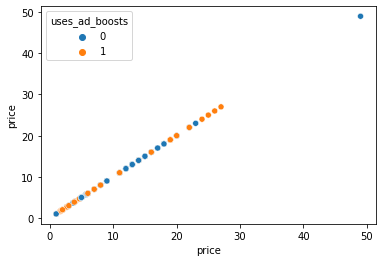

In [17]:
g = sns.scatterplot(data=features, x="price", y= "price", hue="uses_ad_boosts" )

In [18]:
# ANOVA
#price #has_urgency_banner
no_urg = features["price"][features["has_urgency_banner"] ==0]
with_urg = features["price"][features["has_urgency_banner"] ==1]
stats.f_oneway(no_urg,with_urg)

F_onewayResult(statistic=0.4652657238098804, pvalue=0.49527677398313774)

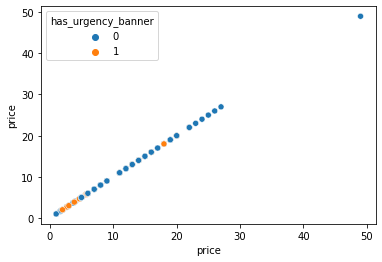

In [19]:
g = sns.scatterplot(data=features, x="price", y= "price", hue="has_urgency_banner" )

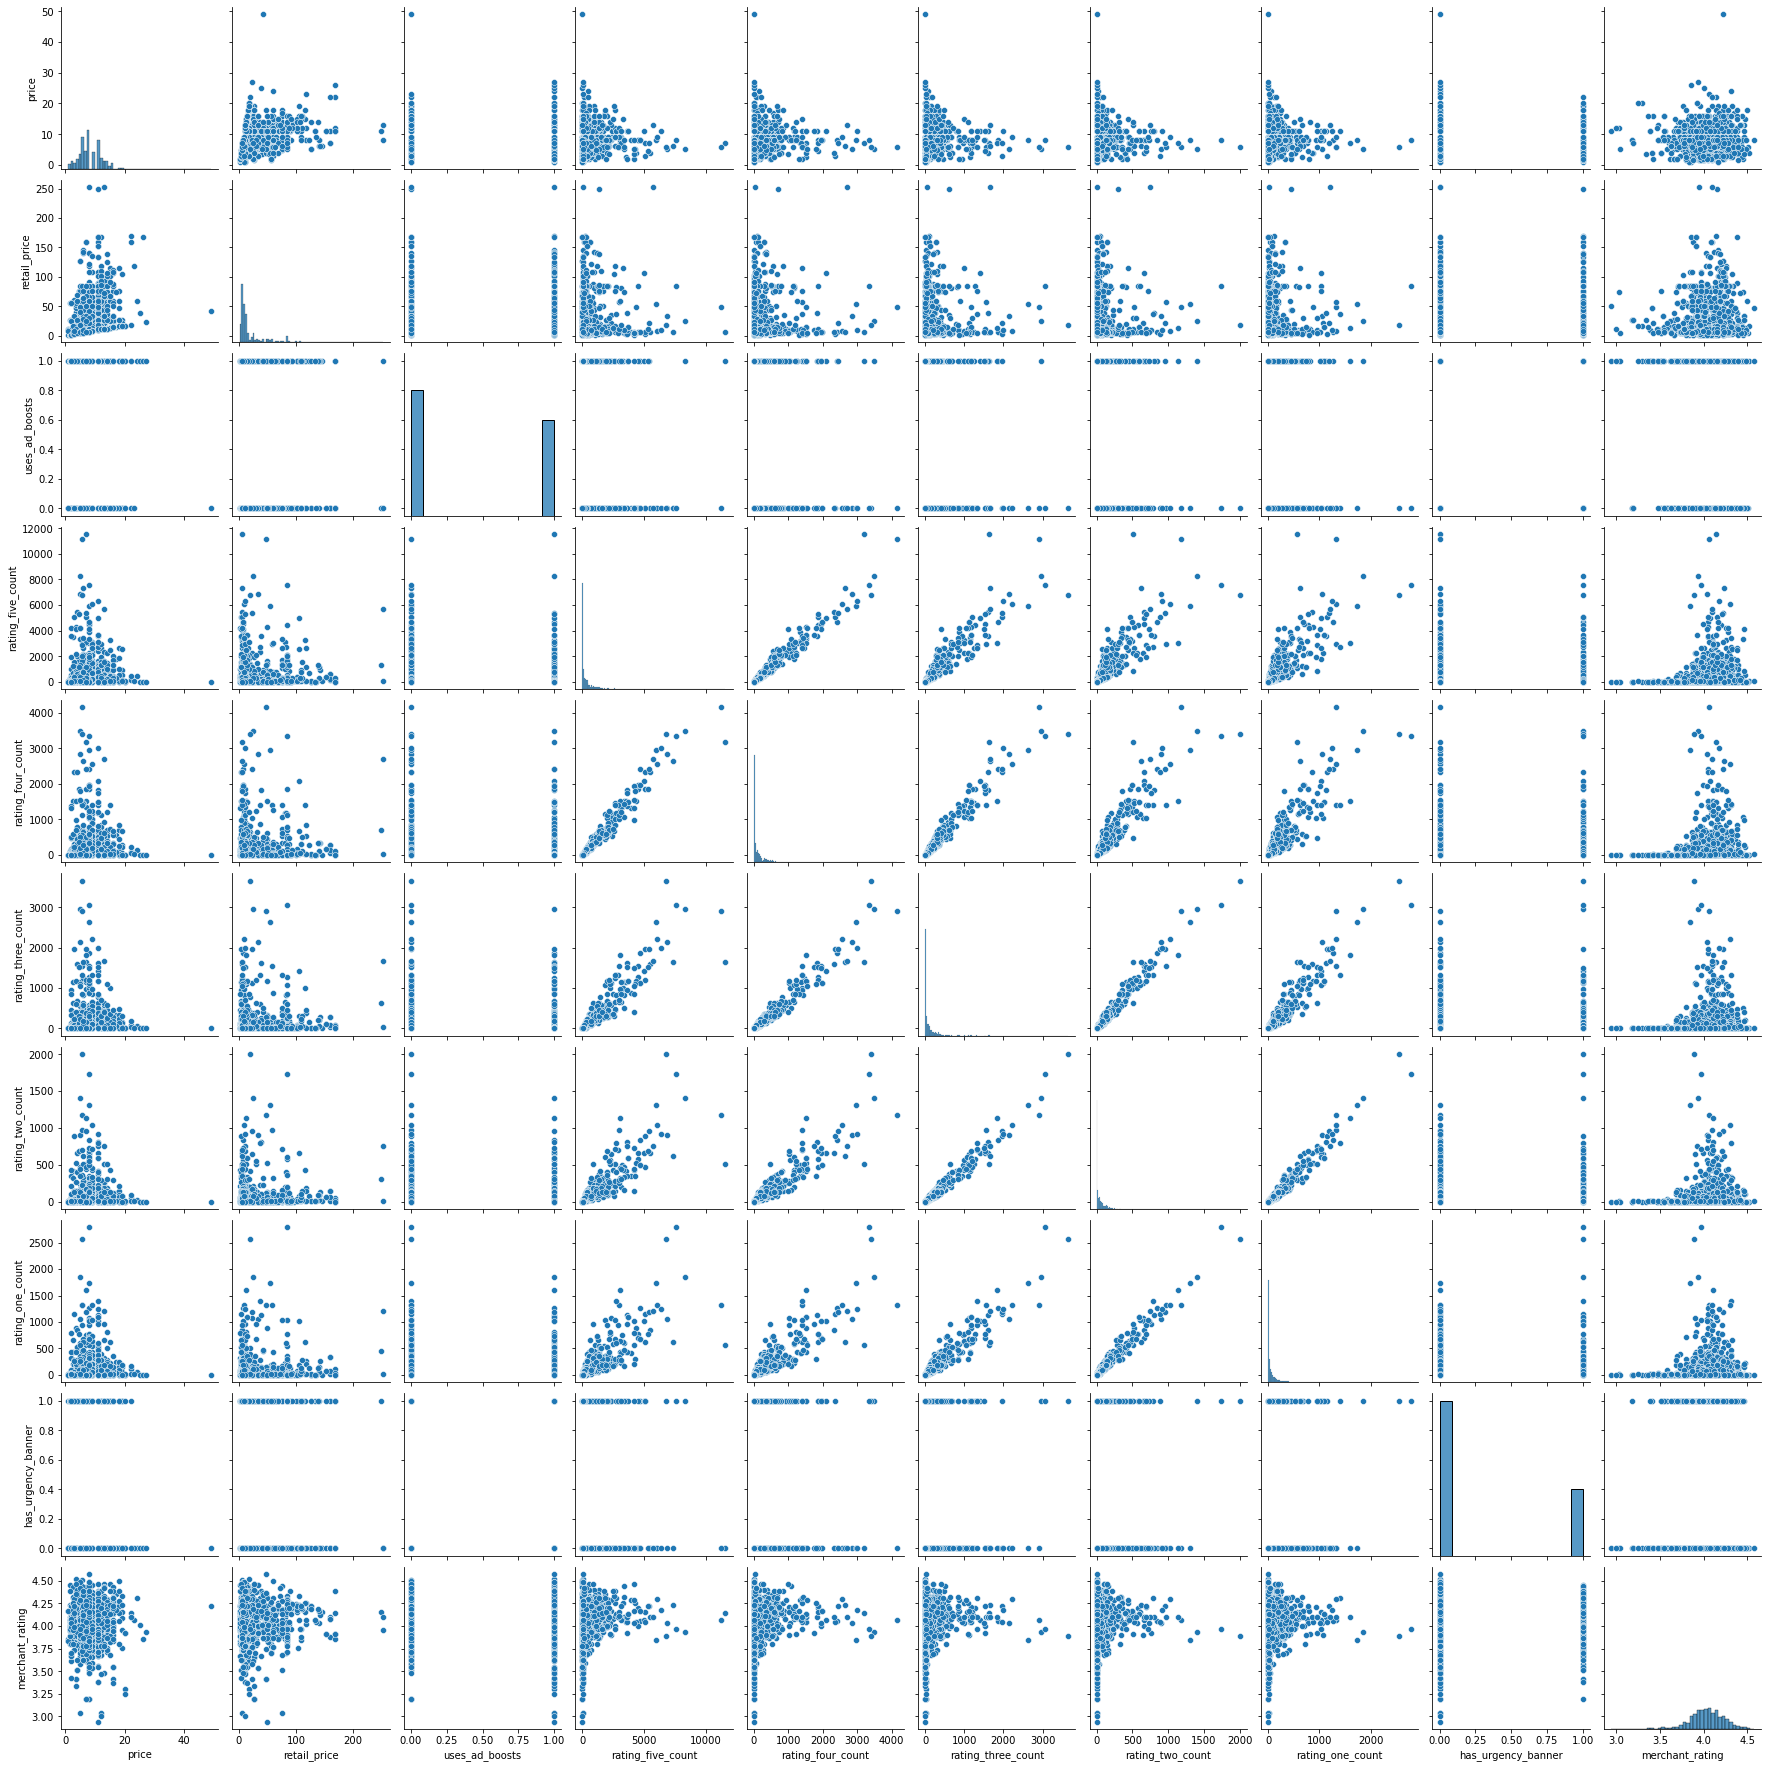

In [20]:
g = sns.pairplot(features)

In [21]:
# Spearman 
price rating_five_count	
price rating_four_count	
price rating_three_count	
price rating_two_count	
price rating_one_count

SyntaxError: invalid syntax (Temp/ipykernel_19128/2834285053.py, line 2)

In [4]:
print(scipy.stats.spearmanr("price", y= "rating_five_count" )[0])

TypeError: spearmanr() got an unexpected keyword argument 'x'